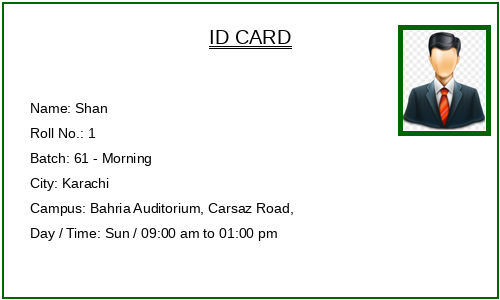

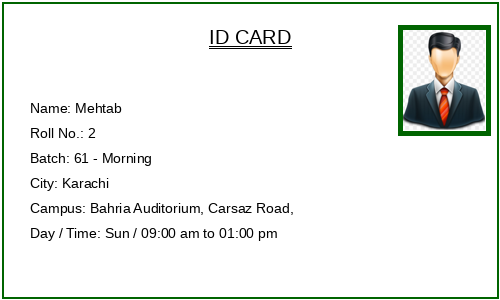

In [72]:
# prompt: Step 4: read excel file "data.xlsx" and print fileds as per headings of table SDATA under excel file and print as many card as data available
# for photo default studentpic.jpg is usable

from PIL import Image, ImageDraw
from PIL import ImageFont, ImageDraw
import pandas as pd

# ... (Your existing code for creating the card_image) ...


def create_id_card(data):
  """Creates an ID card image with the provided data."""

  # Create a transparent image
  card_image = Image.new('RGBA', (500, 300), (0, 0, 0, 0))

  # Create a drawing context
  draw = ImageDraw.Draw(card_image)

  # Define border color and thickness
  border_color = (0, 100, 0)  # Dark green
  border_width = 2

  # Draw the border
  draw.rectangle([(2, 2), (498, 298)], outline=border_color, width=border_width)

  # Define text properties
  text = "ID CARD"
  font_size = 20
  text_color = (0, 0, 0)  # Black
  font_path = '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf'

  try:
    font = ImageFont.truetype(font_path, font_size)
  except OSError:
    print("Font not found. Using default font.")
    font = ImageFont.load_default()

  # Calculate the position to center the text horizontally
  text_bbox = draw.textbbox((0, 0), text, font=font)
  text_width = text_bbox[2] - text_bbox[0]
  text_height = text_bbox[3] - text_bbox[1]

  x = (card_image.width - text_width) // 2
  y = 25

  # Draw the text
  draw.text((x, y), text, fill=text_color, font=font)

  # Draw double underline
  underline_y = y + text_height + 7
  draw.line([(x, underline_y), (x + text_width, underline_y)], fill=text_color, width=1)
  draw.line([(x, underline_y + 2), (x + text_width, underline_y + 2)], fill=text_color, width=1)

  # Load the student picture
  try:
    student_picture = Image.open("StudentPic.jpg")
    # Resize the picture if necessary
    student_picture.thumbnail((100, 100))

    # Ensure the picture has an alpha channel (RGBA mode)
    student_picture = student_picture.convert("RGBA")

    # Calculate the position for the picture
    picture_x = card_image.width - student_picture.width - 15
    picture_y = 30

    # Paste the student picture onto the card image
    card_image.paste(student_picture, (picture_x, picture_y), student_picture)

    # Add a border around the student picture
    border_width_picture = 5
    border_color_picture = (0, 100, 0)

    draw.rectangle(
        [(picture_x - border_width_picture, picture_y - border_width_picture),
         (picture_x + student_picture.width + border_width_picture,
          picture_y + student_picture.height + border_width_picture)],
        outline=border_color_picture,
        width=border_width_picture)

  except FileNotFoundError:
    print("Student picture not found.")

  # Add data fields (replace with your actual data)
  y_offset = 100
  font_size_data = 14

  try:
    font_data = ImageFont.truetype(font_path, font_size_data)
  except OSError:
    print("Font not found. Using default font.")
    font_data = ImageFont.load_default()

  for key, value in data.items():
    draw.text((30, y_offset), f"{key}: {value}", fill=text_color, font=font_data)
    y_offset += 25


  display(card_image)


# Read data from Excel file
try:
  df = pd.read_excel("data.xlsx", sheet_name="SDATA")
  for index, row in df.iterrows():
    create_id_card(row.to_dict())
except FileNotFoundError:
  print("Excel file not found.")
